#### Developing the Word embeddings without pre-trained word embeddings

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import keras

Using Theano backend.


In [2]:
from keras.preprocessing.text import Tokenizer
from keras import models, layers, optimizers, losses, metrics

#### Reading the data from raw files

In [3]:
path = '../../datasets/imdb/aclImdb/train/'
labels = ['pos', 'neg']


data = []
label = []
for l in labels:
    data_dir = os.path.join(path, l)
    print(data_dir)
    for file in os.listdir(data_dir):
        
        if file[-4:]=='.txt':
            with open(os.path.join(data_dir,file), encoding='utf8') as f:
                data.append(f.read())
                if l == 'pos':
                    label.append(1)
                else:
                    label.append(0)
                    
print("Data Length: ", len(data))
print("Label Length: ", len(label))

../../datasets/imdb/aclImdb/train/pos
../../datasets/imdb/aclImdb/train/neg
Data Length:  25000
Label Length:  25000


In [4]:
data[:2]

['Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!',
 'Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything fro

#### Generating index

In [74]:
max_words = 10000
max_len = 100

In [75]:
tokens = Tokenizer(num_words=max_words)
tokens.fit_on_texts(data)

In [76]:
# getting index
word_index = tokens.word_index
print(type(word_index))
print("Length of Word_Index",len(word_index))

<class 'dict'>
Length of Word_Index 87393


In [77]:
sents = tokens.texts_to_sequences(data)
print(sents[:1])
print("Total Sentenses: ", len(sents))

[[9, 402, 2, 208, 11, 15, 239, 320, 100, 109, 5, 31, 3, 170, 343, 4, 1666, 679, 1004, 12, 9, 13, 6041, 5, 60, 10, 86, 36, 48, 9, 656, 4, 8448, 7753, 28, 13, 64, 456, 5, 78, 199, 9, 13, 360, 7753, 249, 1, 108, 4, 4223, 52, 69, 2, 1470, 6416, 249, 1572, 16, 138, 1, 2153, 4, 3, 49, 15, 6, 12, 10, 66, 3215, 16, 258, 1267, 11, 26, 115, 623, 12, 1, 447, 805, 63, 13, 3082, 41, 13, 3447, 31, 2218, 291, 1, 88, 289, 4, 1, 15, 2, 70, 1619, 5, 1794, 291, 1, 339, 289, 137, 1, 805, 9, 22, 64, 208, 105, 383, 8, 1794, 18, 105, 359, 2115, 342, 14, 69, 264, 2936, 22, 5, 372, 245, 60, 90, 2432, 11, 15, 13, 75, 2, 9, 1496, 12, 21, 139, 60, 10, 157, 21, 1556]]
Total Sentenses:  25000


In [78]:
# getting maximum and minimum length of sentenses
print('Max Length of Sentense:', max([len(sent) for sent in sents]))
print('Min Length of Sentense:', min([len(sent) for sent in sents]))

Max Length of Sentense: 2211
Min Length of Sentense: 6


#### Padding the sequences  
Using max length for each sentense is 200

In [79]:
pad_sents = keras.preprocessing.sequence.pad_sequences(sents, maxlen=max_len)
label = np.asarray(label, dtype='float32')

In [80]:
print(pad_sents[:1])

[[ 108    4 4223   52   69    2 1470 6416  249 1572   16  138    1 2153
     4    3   49   15    6   12   10   66 3215   16  258 1267   11   26
   115  623   12    1  447  805   63   13 3082   41   13 3447   31 2218
   291    1   88  289    4    1   15    2   70 1619    5 1794  291    1
   339  289  137    1  805    9   22   64  208  105  383    8 1794   18
   105  359 2115  342   14   69  264 2936   22    5  372  245   60   90
  2432   11   15   13   75    2    9 1496   12   21  139   60   10  157
    21 1556]]


In [81]:
# getting maximum and minimum length of sentenses
print('Max Length of Sentense:', max([len(sent) for sent in pad_sents]))
print('Min Length of Sentense:', min([len(sent) for sent in pad_sents]))

Max Length of Sentense: 100
Min Length of Sentense: 100


#### Shuffling the data

In [82]:
print("Data Shape: ", pad_sents.shape)
print("Label Shape: ", label.shape)

Data Shape:  (25000, 100)
Label Shape:  (25000,)


In [83]:
indices = np.arange(label.shape[0])

np.random.shuffle(indices)
    

pad_sents = pad_sents[indice]
label = label[indice]

print(type(pad_sents), type(label))
print(pad_sents.shape, label.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(25000, 100) (25000,)


#### Splitting the data into Train and Validation

In [84]:
training_samples = 200
validation_samples = 10000

In [85]:
train_data = pad_sents[:training_samples]
train_label = label[:training_samples]

val_data = pad_sents[training_samples:training_samples+validation_samples]
val_label = label[training_samples:training_samples+validation_samples]

print(train_data.shape, val_data.shape, val_data.shape, val_label.shape )

(200, 100) (10000, 100) (10000, 100) (10000,)


#### Building the network without using pre-trained word embeddings

In [86]:
model = models.Sequential()
model.add(layers.Embedding(input_dim=20000, output_dim=200, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 200)          4000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                640032    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 4,640,065
Trainable params: 4,640,065
Non-trainable params: 0
_________________________________________________________________


#### Compiling & Fitting the Network

In [87]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [88]:
hist = model.fit(train_data, train_label,
                epochs=10,
                batch_size=32,
                validation_data=(val_data, val_label))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 0.2732 - acc: 0.9900 - val_loss: 0.0208 - val_acc: 1.0000
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0066 - acc: 1.0000 - val_loss: 0.0089 - val_acc: 1.0000
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 1.0000
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 7.7105e-04 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 4.3919e-04 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 2.6435e-04 - acc: 1.0000 - val_loss: 7.4130e-04 - val_acc: 1.0000
Epoch 8/10
2

In [89]:
def plotting_keras_acc(history):
    history = history.history
    train_acc = history['acc']
    val_acc = history['val_acc']
    train_loss = history['loss']
    val_loss = history['val_loss']
    
    epochs = np.arange(1, len(train_acc)+1)
    
    plt.plot(epochs, train_acc, '.-', label='Train Accuracy')
    plt.plot(epochs, val_acc, '-', label='Validation Accuracy')
    plt.xlabel("epochs")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.legend()
    plt.show()
    
    plt.clf()
    
    plt.plot(epochs, train_loss, '.-', label='Train Loss')
    plt.plot(epochs, val_loss, '-', label='Validation Loss')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend()
    plt.show()

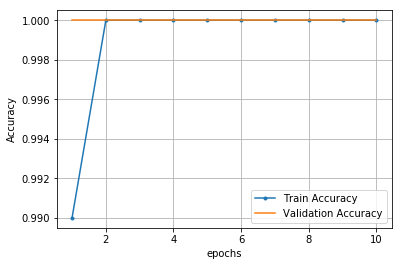

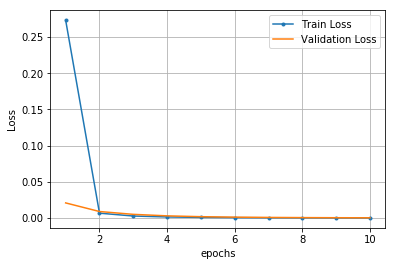

In [90]:
plotting_keras_acc(hist)

#### Loading the test data and saved word embeddings in last exersize

In [91]:
path = '../../datasets/imdb/aclImdb/test/'
labels = ['pos', 'neg']


data = []
label = []
for l in labels:
    data_dir = os.path.join(path, l)
    print(data_dir)
    for file in os.listdir(data_dir):
        
        if file[-4:]=='.txt':
            with open(os.path.join(data_dir,file), encoding='utf8') as f:
                data.append(f.read())
                if l == 'pos':
                    label.append(1)
                else:
                    label.append(0)
                    
print("Data Length: ", len(data))
print("Label Length: ", len(label))

../../datasets/imdb/aclImdb/test/pos
../../datasets/imdb/aclImdb/test/neg
Data Length:  25000
Label Length:  25000


In [92]:
sequences_test = tokens.texts_to_sequences(data)

In [93]:
# padding the data
pad_test_data = keras.preprocessing.sequence.pad_sequences(sequences_test, maxlen=max_len)
test_label = np.asarray(label, dtype='float32')

print(pad_test_data.shape, test_label.shape)

(25000, 100) (25000,)


In [94]:
# loading the saved model

model.load_weights('pre_trained_glove_model.h5')
model.summary()
test_hist=model.evaluate(pad_test_data, test_label)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 200)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
25000/25000 [==============================] - 1s 33us/step


In [99]:
print(test_hist)

[1.1682212801647187, 0.5]
